# Probability density estimation

#### This notebook was developed by [Dalya Baron](https://obs.carnegiescience.edu/dalya-baron)  for the Vatican Observatory Summer School 2023.
<br>
In this notebook we will learn about different methods to estimate the probability density from observations.<br>

<a id='toc'></a>

## This notebook includes:

[Introduction](#EX1)

[Density estimation with a histogram](#EX2)

[Parametric density estimation](#EX3)

[Non-parametric density estimation](#EX4)

In [1]:
from __future__ import print_function, division, absolute_import
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(42)
%matplotlib inline  

## Introduction<a id='EX1'></a>
[Go to top](#toc)<br><br>

A random variable x has a probability distribution p(x).

The relationship between the outcomes of a random variable and its probability is referred to as the probability density, or simply the “density”. If a random variable is continuous, then the probability can be calculated via the probability density function (PDF). The shape of the PDF across the domain for a random variable is referred to as the probability distribution. <br>
**Common probability distributions**: uniform, normal, log-normal, exponential, etc.

Given a random variable, we are interested in the density of its probabilities. For example, given a random sample of a variable, we might want to know things like the shape of the probability distribution, the most likely value, the spread of values, and other properties. The full PDF and its various properties can be used to constrain the physics that govern the objects we are interested in. 

### Two examples from astronomy:

### (1) Initial mass function:
The initial mass function (IMF) is an empirical function that describes the initial distribution of masses for a population of stars during star formation. The IMF not only describes the formation and evolution of individual stars, it also serves as an important link that describes the formation and evolution of galaxies. The IMF is used constantly to place constraints on the physics of the star formation process.
<div>
<img src="figures/IMF_example.png" width="400"/>
</div>

### (2) Hot-neptune desert
Taken from <a href="https://ui.adsabs.harvard.edu/abs/2016A%26A...589A..75M/abstract" target="_blank">here</a>. <br>
A few studies have reported a significant dearth of exoplanets with Neptune mass and radius with orbital periods below $2$--$4$ d. The existence of this desert is similar to the appearance of the so-called brown-dwarf desert that suggests different formation mechanisms of planets and stellar companions with short orbital periods. Similarly, the Neptunian desert might indicate different mechanisms of formation and evolution for hot Jupiters and short-period super-Earths.
<div>
<img src="figures/hot_neptune_desert.png" width="400"/>
</div>

In many cases, we do not know in advance what is the probability distribution of a random variable. While theoretical models might give us some guidence, in many cases, all we have access to is a sample of observations, from which we would like to estimate the probability distribution.

This problem is referred to as **probability density estimation***, as we are using the observations in a random sample to estimate the general density of probabilities beyond just the sample of data we have available. Once we have estimated the probability density, we may wish to compare it to that predicted by theoretical models.

There are a few steps in the process of density estimation for a random variable. The first step is to review the density of observations in the random sample with a simple histogram. From the histogram, we might be able to identify a common and well-understood probability distribution that can be used, such as a normal distribution. If not, we may have to fit a model to estimate the distribution.

In the following parts of the notebook, we will start by learning about the histogram and we will use it to examine the distribution for a sample of observations. We will then review parameteric and nonparametric density estimation methods.

Note that we will focus on univariate data, e.g. one random variable, for simplicity.

## Density estimation with a histogram<a id='EX2'></a>
[Go to top](#toc)<br><br>

The first step in density estimation is to create a histogram of the observations in the random sample.

A histogram is a plot that involves first grouping the observations into bins and counting the number of events that fall into each bin. The counts, or frequencies of observations, in each bin are then plotted as a bar graph with the bins on the x-axis and the frequency on the y-axis.

The choice of the number of bins is important as it controls the coarseness of the distribution (number of bars) and, in turn, how well the density of the observations is plotted. It is a good idea to experiment with different bin sizes for a given data sample to get multiple perspectives or views on the same data.

To illustrate the effect of the number of bins, we will create a random sample drawn from a normal distribution and pretend we don’t know the distribution. We will then create a histogram of the data using varying bin sizes. 

Text(0, 0.5, 'N')

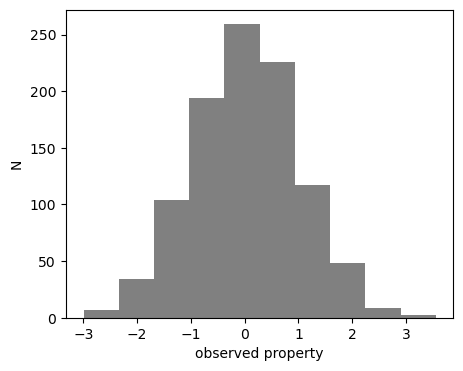

In [59]:
# example of plotting a histogram of a random sample
Nobj = 1000

# generate a sample
sample = np.random.normal(size=Nobj)

# plot a histogram of the sample
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=10, color="grey")
plt.xlabel("observed property")
plt.ylabel("N")

Running the example draws a sample of random observations and creates the histogram with 10 bins. We can clearly see the shape of the normal distribution.

Note that your results will differ given the random nature of the data sample. Try running the example a few times.

Text(0, 0.5, 'N')

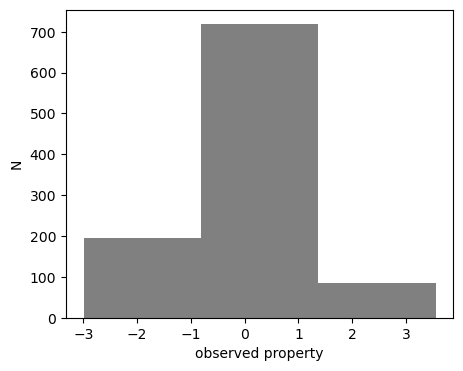

In [60]:
# plot a histogram of the sample
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=3, color="grey")
plt.xlabel("observed property")
plt.ylabel("N")

Reviewing a histogram of a data sample with a range of different numbers of bins will help to identify whether the density looks like a common probability distribution or not.

In many cases in astronomy, you will find more complex distributions. Even when the underlying physics predicts a simple e.g., normal or log-normal, distribution, different biases and selection effects may skew the distribution and even result in multiple peaks. You might also see a large spike in density for a given value or small range of values indicating outliers, often occurring on the tail of a distribution far away from the rest of the density.

### Let's try to break the "histogram"!
In the following example we will simulate a more complex dataset that includes multiple populations, each with a different PDF. In particular, the dataset will contain one class with a narrow distribution in the observed property, and one class with a broad distribution in the observed property. Let's see whether a simple histogram can be used to recover this distribution!

In [26]:
# generate the dataset
class_1 = np.random.normal(loc=20, scale=5, size=1000)
class_2 = np.random.normal(loc=10, scale=1, size=100)
sample = np.concatenate((class_1, class_2))
np.random.shuffle(sample)

Text(0, 0.5, 'N')

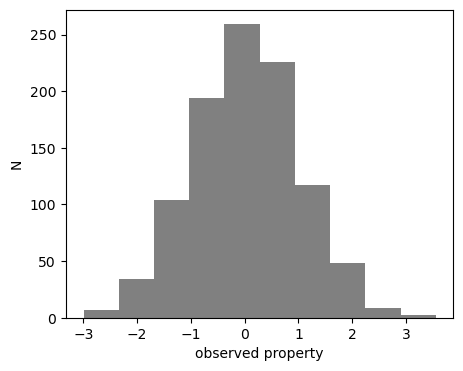

In [61]:
# plot a histogram of the sample
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=10, color="grey")
plt.xlabel("observed property")
plt.ylabel("N")

Where is the second peak?
Let's try to use 20 bins instead of 10:

Text(0, 0.5, 'N')

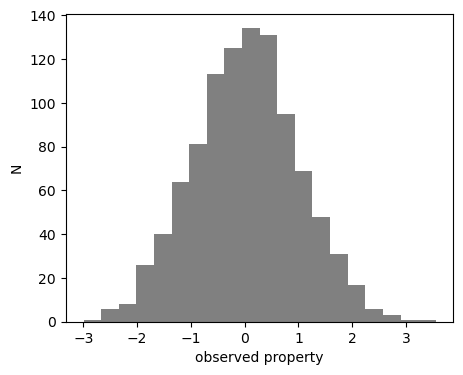

In [62]:
# plot a histogram of the sample
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=20, color="grey")
plt.xlabel("observed property")
plt.ylabel("N")

We can now see the second peak more clearly. <br>
**Dalya's tip to examine the dataset prior to calculating a histogram**: order the values according to the observed property, and plot as a function of the index. This sometimes reveals the interesting structure in the data and can be used as a guide for the bin size:

Text(0.5, 0, 'observed property')

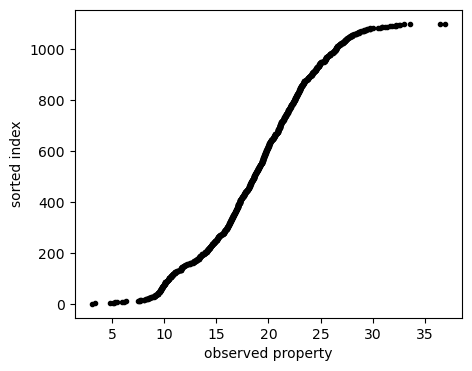

In [35]:
sample_copy = np.copy(sample)
sample_sorted = np.sort(sample_copy)

plt.figure(1, figsize=(5, 4))
plt.plot(sample_sorted, np.arange(len(sample_sorted)), ".k")
plt.ylabel("sorted index")
plt.xlabel("observed property")

We can see that something interesting happens near the observed property of 10.

## Parametric Density Estimation<a id='EX3'></a>
[Go to top](#toc)<br><br>

The shape of a histogram may sometimes match a well-known probability distribution, where common densities are the normal, log-normal, uniform, exponential, and more. It may be useful to get familiar with the common probability distributions as it will help you to identify a given distribution from a histogram.

Once identified, you can attempt to estimate the density of the random variable with a chosen probability distribution. This can be achieved by estimating the parameters of the distribution from a random sample of data.

For example, the normal distribution has two parameters: the mean and the standard deviation. Given these two parameters, we now know the probability distribution function. These parameters can be estimated from data by calculating the sample mean and sample standard deviation.

This process is called **parametric density estimation**. In this process, we are using predefined functions to summarize the relationship between observations and their probability that can be controlled or configured with parameters, hence “parametric“.

Once we have estimated the density, we can check if it is a good fit. This can be done in many ways, such as:
* Plotting the density function and comparing the shape to the histogram.
* Sampling the density function and comparing the generated sample to the real sample.
* Using a statistical test to confirm the data fits the distribution.
We can demonstrate this with an example.


#### Example
We can generate a random sample of 1000 observations from a normal distribution with a mean of 50 and a standard deviation of 5. We can then pretend that we don’t know the probability distribution and maybe look at a histogram and guess that it is normal. Assuming that it is normal, we can then calculate the parameters of the distribution, specifically the mean and standard deviation.

We would not expect the mean and standard deviation to be 50 and 5 exactly given the small sample size and noise in the sampling process.

In [36]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm

Mean=50.014, Standard Deviation=5.060


Text(0.5, 0, 'observed property')

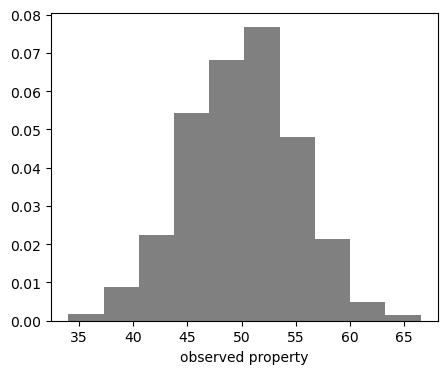

In [39]:
# generate a sample
sample = normal(loc=50, scale=5, size=1000)

# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

# plot the histogram of the sample
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=10, density=True, color="grey")
plt.xlabel("observed property")

Using these estimated parameters, we now have our estimated probability distribution function, which we will define below. We can then sample the probabilities from this distribution for a range of values. In this case, we will sample the distirbution between 30 and 70.

In [38]:
# define the distribution
dist = norm(sample_mean, sample_std)

# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]

Finally, we can plot a histogram of the data sample and overlay a line plot of the probabilities calculated for the range of values from the PDF.

Importantly, we can convert the counts or frequencies in each bin of the histogram to a normalized probability to ensure the y-axis of the histogram matches the y-axis of the line plot. This can be achieved by setting the “density” argument to “True” in the call to hist().

Text(0, 0.5, 'density')

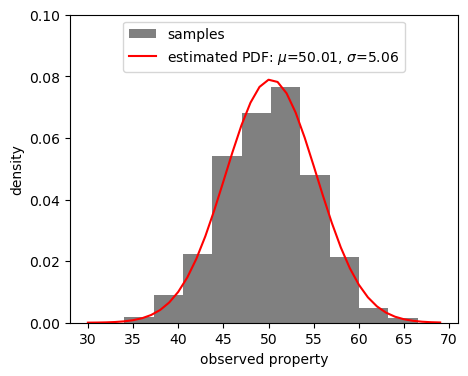

In [47]:
# plot the histogram and pdf
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=10, density=True, label="samples", color="grey")
plt.plot(values, probabilities, color="r", label="estimated PDF: $\mu$=%.2f, $\sigma$=%.2f" % (sample_mean,
                                                                                               sample_std))
plt.ylim(ymax=0.1)
plt.legend(loc="upper center")
plt.xlabel("observed property")
plt.ylabel("density")

Note that your results will differ given the random nature of the data sample. Try running the example a few times.

In this case, we can see that the mean and standard deviation have some noise and are slightly different from the expected values of 50 and 5 respectively. The deviation from the values we get will decrease with increasing number of samples. 

## Nonparametric Density Estimation<a id='EX4'></a>
[Go to top](#toc)<br><br>

As noted previously, in many cases in astronomy we would not expect the distribution to resemble one of the common probability distributions. The distribution may show two peaks (bimodal distribution), or even many peaks (multimodal distribution).

### The bimodal galaxy population
Perhaps one of the most notable examples in astornomy is the galaxy bimodality, where galaxies in the local universe can be roughly divided into two classes. The first class includes the blue star-forming galaxies, that show high star formation rates that are proportional to their stellar mass. The second class includes the quiescent elliptical galaxies, that show little star formation but have high stellar masses. Later in this notebook we will perfom nonparameteric density estimation using galaxies observed by the SDSS.

When the distribution does not resemble one of the common probability distributions, we can approximate the probability distribution of the data without a pre-defined distribution. This process is called **nonparameteric density estimation**.

The distributions will still have parameters but are not directly controllable in the same way as simple probability distributions. For example, a nonparametric method might estimate the density using all observations in a random sample, in effect making all observations in the sample “parameters.”

Perhaps the most common nonparametric approach for estimating the probability density function of a continuous random variable is called kernel smoothing, or **kernel density estimation** (KDE).

### Kernel Density Estimation (KDE)

This is a nonparametric method for using a dataset to estimating probabilities for new points. The method has two free parameters: the **bandwidth** and the **kernel function**, which are described below.

A kernel is a mathematical function that returns a probability for a given value of a random variable. The kernel effectively smooths or interpolates the probabilities across the range of outcomes for a random variable such that the sum of probabilities equals one, a requirement of well-behaved probabilities. The kernel function weights the contribution of observations from a data sample based on their relationship or distance to a given query sample for which the probability is requested.

1. **Bandwidth**, sometimes called the smoothing parameter, is a parameter that controls the number of samples or window of samples used to estimate the probability for a new point. A large window may result in a coarse density with little details, whereas a small window may have too much detail and not be smooth or general enough to correctly cover new or unseen examples. 

2. **Kernel function**, sometimes called the basis function, is a function that is used to parametrize and control the contribution of each of the samples within the window. Different basis functions, e.g., uniform versus normal, will have different effects on the smoothness of the resulting density function. Therefore, it may be useful to experiment with different window sizes and different contribution functions and evaluate the results against histograms of the data.

### Illustration with a simple example

To illustrate this process and to examine the effect of the KDE parameters, we will start with a simple simulated example.

We will construct a bimodal distribution by combining samples from two different normal distributions. Specifically, 300 examples with a mean of 20 and a standard deviation of 5 (the smaller peak), and 700 examples with a mean of 40 and a standard deviation of 5 (the larger peak). The means were chosen close together to ensure the distributions overlap in the combined sample.

In [51]:
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity

Text(0, 0.5, 'N')

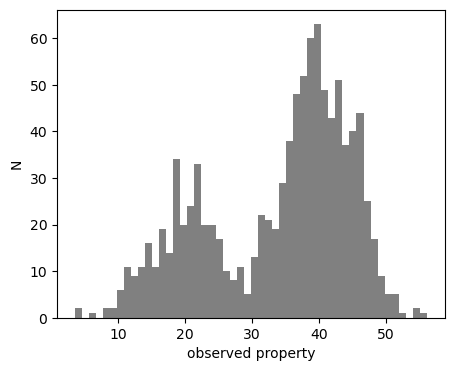

In [50]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

# plot the histogram
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=50, color="grey")
plt.xlabel("observed property")
plt.ylabel("N")

Try running this example a few times and see how the resulting histogram changes.

We will now use the KDE implementation by scikit-learn to perform the nonparameteric density estimation. For this, we will choose `bandwidth=2`, and `kernel='gaussian'`. You are encouraged to experiment with different parameters and examine their impact on the resulting density. 

In [53]:
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

We can then evaluate how well the density estimate matches our data by calculating the probabilities for a range of observations and comparing the shape to the histogram, just like we did for the parametric case in the prior section.

Text(0, 0.5, 'N')

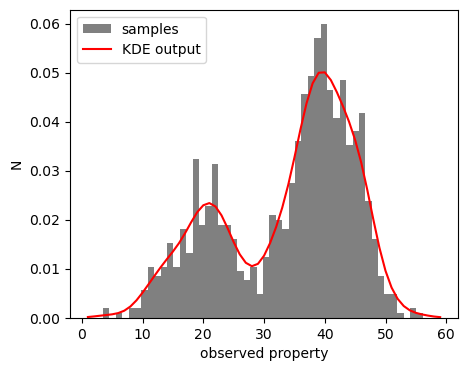

In [58]:
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)

# plot the histogram and pdf
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(sample, bins=50, density=True, color="grey", label="samples")
plt.plot(values[:], probabilities, color="r", label="KDE output")
plt.legend(loc="upper left")
plt.xlabel("observed property")
plt.ylabel("N")

Note that the KernelDensity class is powerful and **does support** estimating the PDF for multidimensional data.

### Illustration with SDSS galaxies

In the following example we will load a sample of star formation rates estimated using the optical spectra of galaxies obtained by the SDSS. In particular, these galaxies have been selected to have $z < 0.2$ and in the stellar mass range $\log (M_{*}/M_{\odot})$ of 10 to 11 using an SQL query in the CasJobs interface. This is a small subset of the full SDSS galaxy sample. 

Text(0, 0.5, 'logSFR [Msol/yr]')

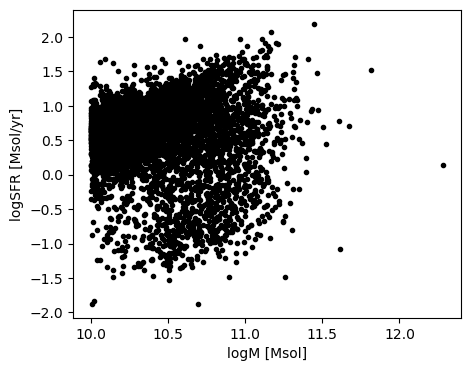

In [80]:
path = "SDSS_galaxies_sample.csv"
logM, logSFR = np.loadtxt(path, delimiter=",", skiprows=1, usecols=[0,1], unpack=True)

# plot the 2d distribution
plt.figure(1, figsize=(5, 4))
plt.plot(logM, logSFR, ".k")
plt.xlabel("logM [Msol]")
plt.ylabel("logSFR [Msol/yr]")

Lets assume that we are interested in estimating the distribution of star formation rate. We will start by ploting the histogram of the SFR, and will then fit it with KDE.

Text(0, 0.5, 'N')

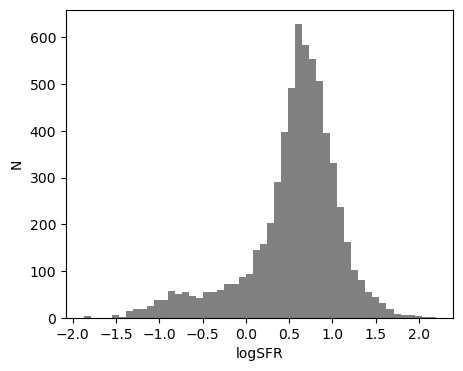

In [81]:
# plot the histogram
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(logSFR, bins=50, color="grey")
plt.xlabel("logSFR")
plt.ylabel("N")

maybe log-scale in the y-axis?

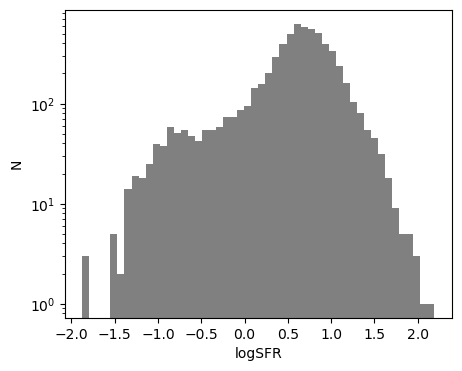

In [82]:
# plot the histogram
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(logSFR, bins=50, color="grey")
plt.xlabel("logSFR")
plt.ylabel("N")
plt.yscale("log")

Now let's fit the distribution with KDE. We will start with the same bandwidth as before: 2. This is work very badly. We will then decrease the number until the resulting distribution resembles the observed one (~0.1).

Text(0, 0.5, 'N')

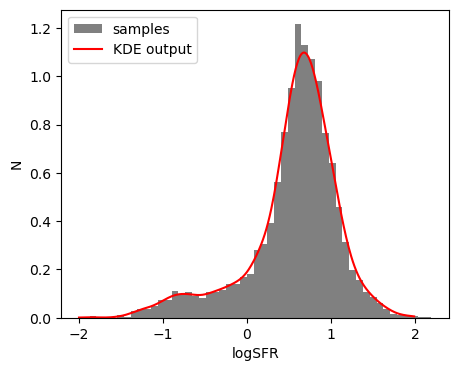

In [86]:
# fit density
model = KernelDensity(bandwidth=0.1, kernel='gaussian')
sample = logSFR.reshape((len(logSFR), 1))
model.fit(sample)

# sample probabilities for a range of outcomes
values = asarray([value for value in np.arange(-2, 2, 0.01)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)

# plot the histogram and pdf
plt.figure(1, figsize=(5, 4))
tmp = plt.hist(logSFR, bins=50, density=True, color="grey", label="samples")
plt.plot(values[:], probabilities, color="r", label="KDE output")
plt.legend(loc="upper left")
plt.xlabel("logSFR")
plt.ylabel("N")